In [159]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import csv
import numpy as np
import torch.utils.data as D

In [160]:
x = []
y = []

In [161]:
InputFile = open("input_test.csv","r")
InputReader = csv.reader(InputFile)
for item in InputReader:
    # print(item)
    item = [float(i) for i in item]
    # print(item)
    # print(item[1:-1])
    x.append(item)
# print(x)
# 14列

In [162]:

OutputFile = open("output_test.csv","r")
OutputReader = csv.reader(OutputFile)
for item in OutputReader:
    # print(item)
    item = [float(i) for i in item]
    y.append(item)
# print(y)
# 8列

In [163]:
x = np.array(x)
y = np.array(y)

In [164]:
print(x.shape)
print(y.shape)

(25, 21)
(25, 8)


In [165]:
# x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)

# x = torch.FloatTensor([[1.3],[2.1]])
# y = x.pow(2) + 0.2*torch.rand(x.size())

x = torch.FloatTensor(x)
y = torch.FloatTensor(y)
# y = x.pow(2) + 0.2*torch.rand(x.size())

x,y = Variable(x), Variable(y)
# x = Variable(x)

print(x)
print(y)

tensor([[0.0435, 0.0510, 0.0644, 0.0660, 0.0508, 0.0512, 0.0520, 0.0461, 0.0547,
         0.0483, 0.0511, 0.0462, 0.0421, 0.0417, 0.0423, 0.0390, 0.0431, 0.0392,
         0.0345, 0.0355, 0.0119],
        [0.0450, 0.0563, 0.0660, 0.0588, 0.0514, 0.0543, 0.0542, 0.0457, 0.0520,
         0.0487, 0.0454, 0.0492, 0.0453, 0.0460, 0.0464, 0.0437, 0.0435, 0.0407,
         0.0357, 0.0372, 0.0169],
        [0.0170, 0.0189, 0.0234, 0.0210, 0.0202, 0.0190, 0.0193, 0.0165, 0.0192,
         0.0173, 0.0182, 0.0164, 0.0167, 0.0158, 0.0162, 0.0152, 0.0145, 0.0145,
         0.0129, 0.0132, 0.0071],
        [0.0207, 0.0179, 0.0253, 0.0243, 0.0211, 0.0214, 0.0206, 0.0181, 0.0200,
         0.0185, 0.0191, 0.0189, 0.0168, 0.0170, 0.0185, 0.0160, 0.0165, 0.0156,
         0.0140, 0.0141, 0.0064],
        [0.0195, 0.0197, 0.0231, 0.0211, 0.0199, 0.0206, 0.0214, 0.0198, 0.0196,
         0.0180, 0.0192, 0.0183, 0.0170, 0.0168, 0.0175, 0.0162, 0.0162, 0.0151,
         0.0136, 0.0137, 0.0068],
        [0.0208, 0.0

In [166]:
# plt.scatter(x.data.numpy(),y.data.numpy())
# plt.show()

In [167]:
class Net(torch.nn.Module):
   def __init__(self, n_feature, n_hidden, n_output):
       super(Net, self).__init__()
       self.hidden = torch.nn.Linear(n_feature,n_hidden)
       self.predict = torch.nn.Linear(n_hidden,n_output)
   
   def forward(self, x):
       x = F.tanh(self.hidden(x))
    #    x = F.softmax(self.predict(x))
       x = self.predict(x)
       return x

In [168]:
net = Net(21, 20, 8)
print(net)


Net(
  (hidden): Linear(in_features=21, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=8, bias=True)
)


In [169]:
# plt.ion()
# plt.show()

In [170]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02, weight_decay=0.02)
# optimizer = torch.optim.SGD(net.parameters(), lr=0.002, weight_decay=0.02)
loss_func = nn.MSELoss()

In [171]:
BATCH_SIZE = 25
TRAIN_TIMES = 200

In [172]:
losslist = []
timelist = []

In [173]:
torch_dataset = D.TensorDataset(x, y)

loader = D.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
)

for epoch in range(TRAIN_TIMES):
    for step, (batch_x, batch_y) in enumerate(loader):
        
        prediction = net(batch_x)
        loss = loss_func(prediction, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # for test
        if epoch%20 == 0:
            print(loss.data.numpy())

        losslist.append(loss.data.numpy())
        timelist.append(epoch)

347.24933
55.368145
8.908922
7.948949
7.917393
7.9147797
7.9143863
7.914248
7.9141426
7.9140406


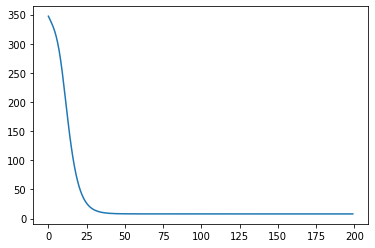

In [174]:
plt.plot(timelist, losslist)

In [175]:
torch.save(net.state_dict(), './model-version-1-args.model')

In [176]:
net = Net(21, 20, 8)
net.load_state_dict(torch.load('./model-version-1-args.model'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [177]:
print(net)

Net(
  (hidden): Linear(in_features=21, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=8, bias=True)
)


In [178]:
print((net(x)).detach().numpy())
print(y.numpy())

[[44.932487    2.9816322  17.29873    12.017725    8.976367   11.901847
   0.47363156  0.22683981]
 [44.936386    2.9814124  17.30068    12.018703    8.977405   11.903119
   0.4739312   0.22725019]
 [44.767513    2.9724398  17.234352   11.97561     8.940574   11.855713
   0.46854132  0.2228128 ]
 [44.776825    2.9729614  17.237925   11.978       8.942648   11.858308
   0.4687919   0.22303236]
 [44.7733      2.9727516  17.23663    11.977098    8.941862   11.857288
   0.4686911   0.22297078]
 [44.779533    2.9731584  17.239044   11.978712    8.943203   11.85905
   0.4688527   0.22310495]
 [44.807693    2.974705   17.249828   11.985968    8.949218   11.866661
   0.46966684  0.22362751]
 [44.811863    2.9752975  17.251402   11.987179    8.949895   11.867522
   0.46956295  0.22344533]
 [44.79635     2.9739213  17.245792   11.982919    8.946856   11.863894
   0.46953082  0.22360423]
 [44.785233    2.9733272  17.241234   11.980066    8.944447   11.86065
   0.4691136   0.22335497]
 [44.84456  

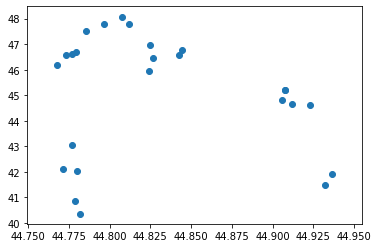

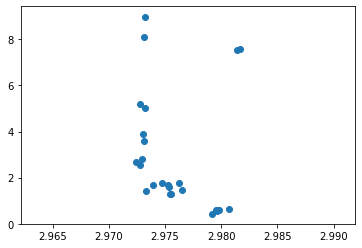

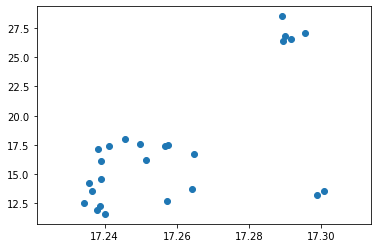

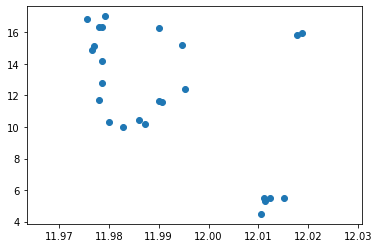

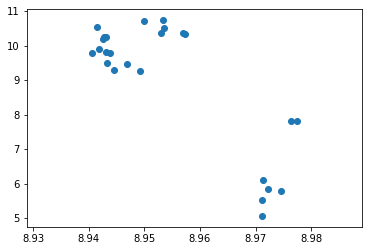

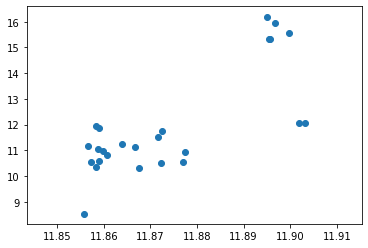

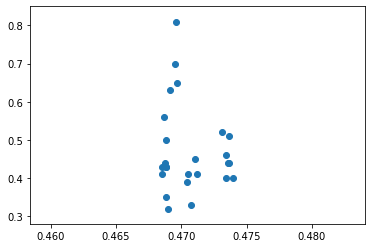

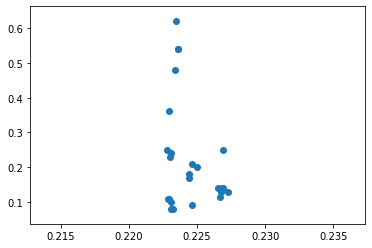

In [179]:
prediction_y_np = (net(x)).detach().numpy()
training_y_np = y.numpy()
plt.ion()
for i in range(8):
    plt.scatter([item[i] for item in prediction_y_np], [item[i] for item in training_y_np])
    plt.pause(1)

In [180]:
# optimizer = torch.optim.SGD(net.parameters(),lr=0.2)
# loss_func = torch.nn.MSELoss()

# for t in range(100):
#     prediction = net(x)

#     loss = loss_func(prediction, y)

#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     if t % 5 == 0:
#         plt.cla()
#         plt.scatter(x.data.numpy(),y.data.numpy())
#         plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
#         plt.text(0.5,0,'Loss=%.4f'%loss.data,fontdict={'size':20,'color':'red'})
#         plt.pause(0.1)

# plt.ioff()
# plt.show()
